In [130]:
!pip install kneed

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator                          # Helps find the "elbow" point automatically
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# Load the dataset
df = pd.read_csv("marketing_campaign.csv")

In [133]:
# Impute missing income values with the median
df['Income'].fillna(df['Income'].median(), inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_44184\3317374401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [134]:
# Selecting features for clustering (Excluding campaign-related columns)
clustering_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [135]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_features])

In [136]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [137]:
#Considering all features like demographics, past purchase behaviour, online activity

In [138]:
# Selecting the correct features for clustering (excluding campaign response columns)
clustering_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Year_Birth', 
                       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                       'NumStorePurchases', 'NumWebVisitsMonth']

In [139]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_features])

In [140]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
cluster_range = range(1, 11)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [141]:
# Use KneeLocator to automatically find the "elbow" point
knee_locator = KneeLocator(cluster_range, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.elbow

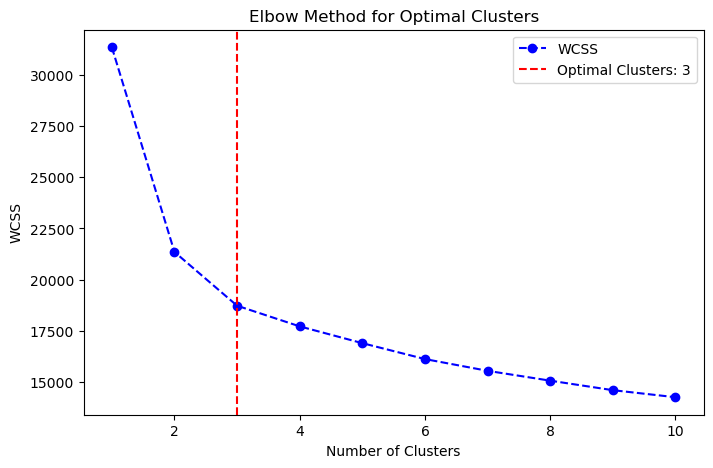

In [142]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--', color='b', label="WCSS")
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f"Optimal Clusters: {optimal_clusters}")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.legend()
plt.show()

In [143]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['CustomerSegment'] = kmeans.fit_predict(df_scaled)

print(f"Customer segmentation completed. Optimal clusters = {optimal_clusters}. Segments are labeled in 'CustomerSegment' column.")

Customer segmentation completed. Optimal clusters = 3. Segments are labeled in 'CustomerSegment' column.


In [144]:
# --- PCA for Visualization ---
pca = PCA(n_components=2)  # Reduce dimensions to 2
df_pca = pca.fit_transform(df_scaled)

In [145]:
# Create a DataFrame for visualization
pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['CustomerSegment']

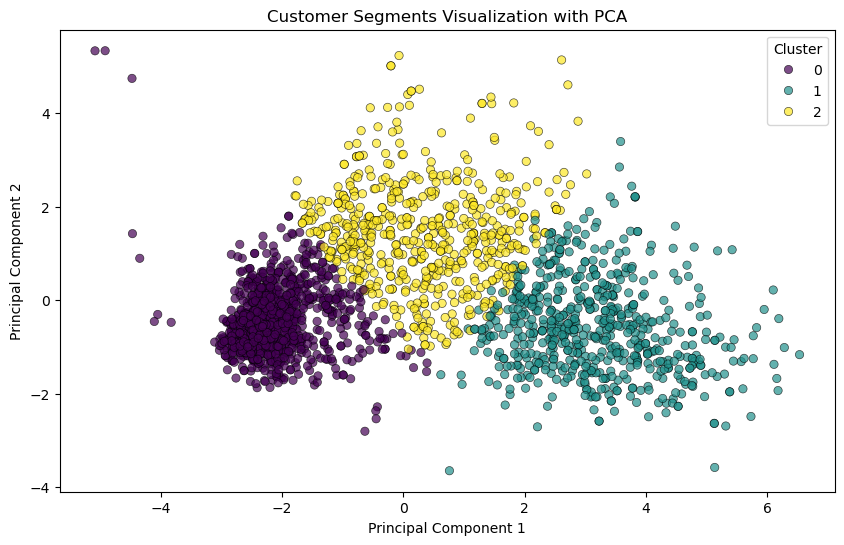

In [146]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7, edgecolor='k')
plt.title('Customer Segments Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [147]:
# Grouping data by clusters
cluster_summary = df.groupby("CustomerSegment")[clustering_features].mean()

# Display summary statistics
print("Summary Statistics by Cluster:")
print(cluster_summary)

Summary Statistics by Cluster:
                       Income    Recency    MntWines  MntFruits  \
CustomerSegment                                                   
0                35105.392683  49.730732   39.758049   4.822439   
1                76154.439103  49.687500  591.580128  68.491987   
2                56699.945008  47.421320  458.406091  19.010152   

                 MntMeatProducts  MntFishProducts  MntSweetProducts  \
CustomerSegment                                                       
0                      21.772683         6.765854          5.057561   
1                     442.684295        99.133013         70.923077   
2                     127.607445        25.825719         18.918782   

                 MntGoldProds   Year_Birth  NumDealsPurchases  \
CustomerSegment                                                 
0                   14.813659  1971.356098           1.951220   
1                   78.661859  1968.184295           1.437500   
2                

C:\Users\prash\AppData\Local\Temp\ipykernel_44184\2811257304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CustomerSegment', y='Income', palette='Set2')


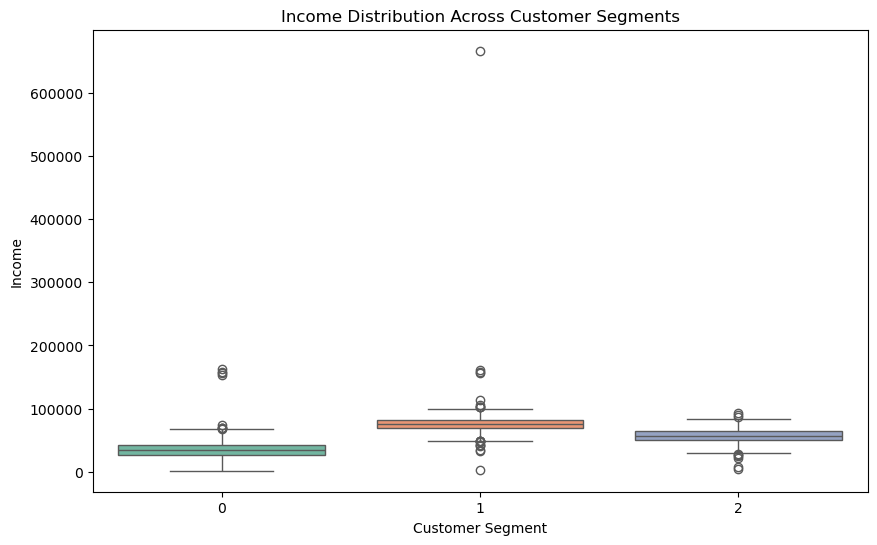

In [148]:
# --- Visualizing Income Distribution by Cluster ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CustomerSegment', y='Income', palette='Set2')
plt.title("Income Distribution Across Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Income")
plt.show()

<Figure size 1200x600 with 0 Axes>

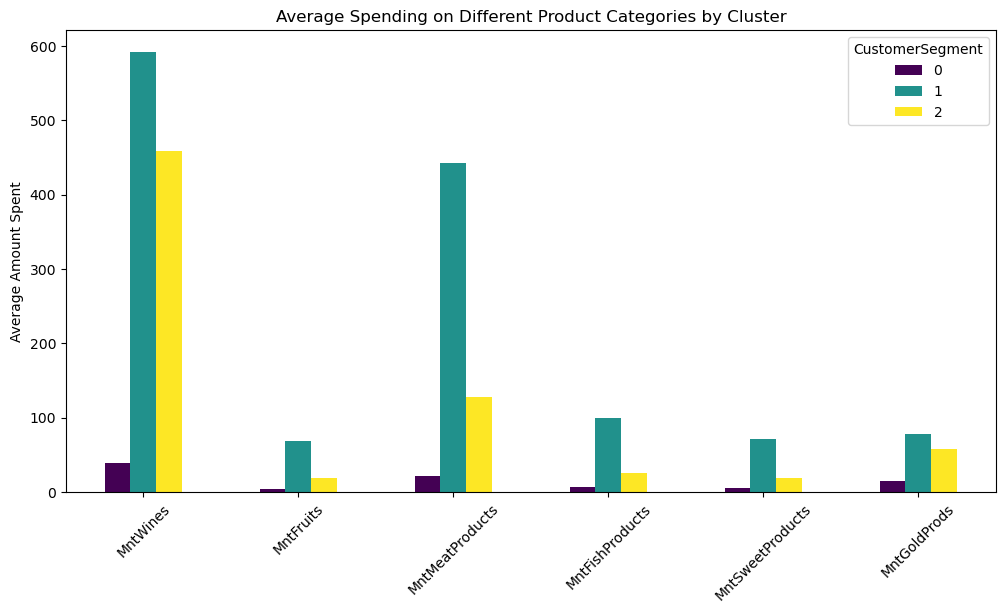

In [149]:
# --- Visualizing Spending Habits by Cluster ---
spending_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(12, 6))
df.groupby('CustomerSegment')[spending_features].mean().T.plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.title("Average Spending on Different Product Categories by Cluster")
plt.ylabel("Average Amount Spent")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

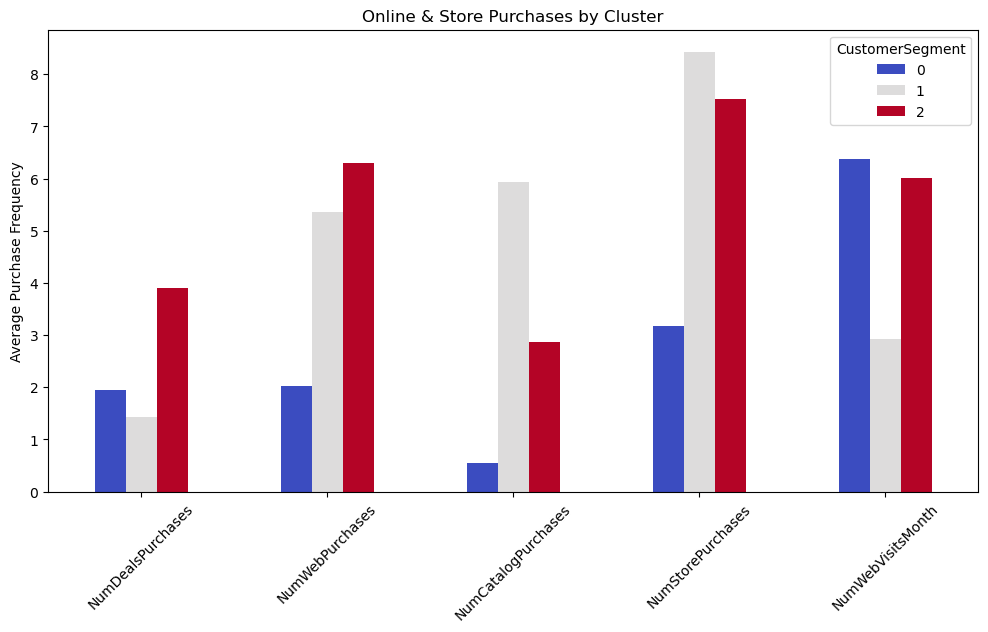

In [150]:
# --- Visualizing Online Activity by Cluster ---
online_features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
plt.figure(figsize=(12, 6))
df.groupby('CustomerSegment')[online_features].mean().T.plot(kind='bar', figsize=(12,6), colormap='coolwarm')
plt.title("Online & Store Purchases by Cluster")
plt.ylabel("Average Purchase Frequency")
plt.xticks(rotation=45)
plt.show()

Spending Summary by Cluster:
                    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
CustomerSegment                                                            
0                 39.758049   4.822439        21.772683         6.765854   
1                591.580128  68.491987       442.684295        99.133013   
2                458.406091  19.010152       127.607445        25.825719   

                 MntSweetProducts  MntGoldProds  
CustomerSegment                                  
0                        5.057561     14.813659  
1                       70.923077     78.661859  
2                       18.918782     58.104907  


C:\Users\prash\AppData\Local\Temp\ipykernel_44184\3027767751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CustomerSegment', y='TotalAcceptedCampaigns', palette='Set3')


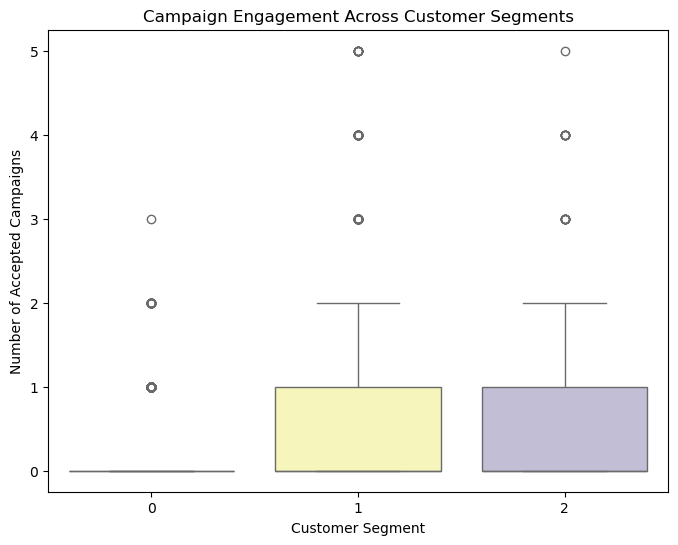

In [151]:
# Analyzing average spending per cluster
spending_summary = df.groupby("CustomerSegment")[spending_features].mean()
print("Spending Summary by Cluster:\n", spending_summary)

# Visualizing campaign response rates by cluster
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['TotalAcceptedCampaigns'] = df[campaign_cols].sum(axis=1)

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='CustomerSegment', y='TotalAcceptedCampaigns', palette='Set3')
plt.title("Campaign Engagement Across Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Accepted Campaigns")
plt.show()

<Figure size 600x300 with 0 Axes>

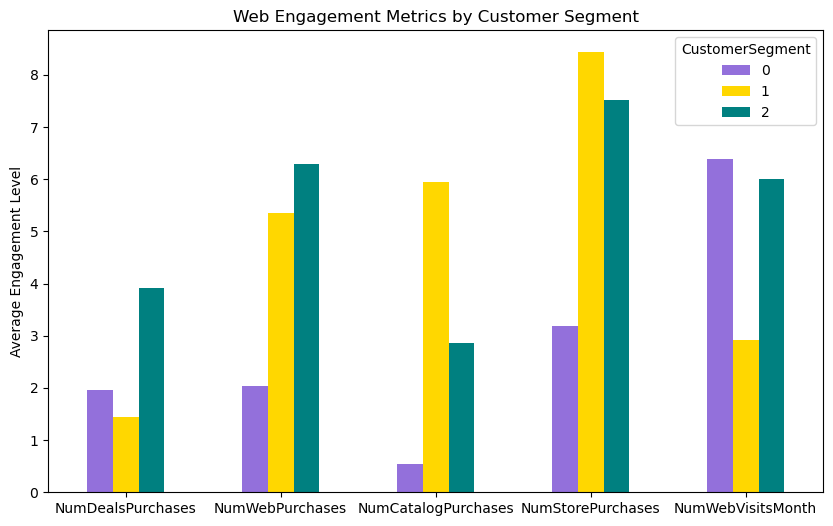

In [152]:
# Define custom medium colors (Medium Purple, Medium Yellow, Teal)
custom_colors = ["#9370DB", "#FFD700", "#008080"]  # Medium Purple, Medium Yellow, Teal

# Plot the bar chart with custom colors
plt.figure(figsize=(6,3))
df.groupby('CustomerSegment')[online_features].mean().T.plot(kind='bar', figsize=(10,6), color=custom_colors)
plt.title("Web Engagement Metrics by Customer Segment")
plt.ylabel("Average Engagement Level")
plt.xticks(rotation=0)
plt.show()